In [1]:
!gdown --id 18DY3N9IPT1zzz8cESZ1gRQgw6JNHmmII

Downloading...
From: https://drive.google.com/uc?id=18DY3N9IPT1zzz8cESZ1gRQgw6JNHmmII
To: /content/article_csvs.zip
31.8MB [00:00, 76.6MB/s]


In [2]:
!unzip article_csvs.zip

Archive:  article_csvs.zip
  inflating: asy_preds_quiet.csv     
  inflating: preds_quiet.csv         
  inflating: preds_storms.csv        
  inflating: preds_storms_asy.csv    


In [3]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error as msem
from sklearn.metrics import r2_score as r2m
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
SAVE_FIGS = True

if (SAVE_FIGS):
    !mkdir plots_out

df_quiet_sym = pd.read_csv('./preds_quiet.csv')
df_quiet_sym.set_index('date', inplace=True)
df_quiet_sym.index = pd.to_datetime(df_quiet_sym.index)

df_quiet_asy = pd.read_csv('./asy_preds_quiet.csv')
df_quiet_asy.set_index('date', inplace=True)
df_quiet_asy.index = pd.to_datetime(df_quiet_asy.index)

df_storms_sym = pd.read_csv('./preds_storms.csv')
df_storms_sym.set_index('date', inplace=True)
df_storms_sym.index = pd.to_datetime(df_storms_sym.index)

df_storms_asy = pd.read_csv('./preds_storms_asy.csv')
df_storms_asy.set_index('date', inplace=True)
df_storms_asy.index = pd.to_datetime(df_storms_asy.index)

In [5]:
TRAINING_STORMS_DATES_START_SYM = [
    "19980214",
    "19980802",
    "19980919",
    "19990216",
    "19991015",
    "20000709",
    "20000806",
    "20000915",
    "20001101",
    "20010314",
    "20010406",
    "20011017",
    "20011031",
    "20020517",
    "20031115",
    "20040720",
    "20050510",
    "20060409",
    "20061209",
    "20120301",
]
TRAINING_STORMS_DATES_END_SYM = [
    "199802222355",
    "199808082355",
    "199809292355",
    "199902242355",
    "199910252355",
    "200007192355",
    "200008162355",
    "200009252355",
    "200011152355",
    "200103242355",
    "200104162355",
    "200110222355",
    "200111102355",
    "200205272355",
    "200311252355",
    "200407302355",
    "200505202355",
    "200604192355",
    "200612192355",
    "201203112355",
]

VALIDATION_STORMS_DATES_START_SYM = [
    "19980428",
    "19990919",
    "20031025",
    "20150618",
    "20170901",
]
VALIDATION_STORMS_DATES_END_SYM = [
    "199805082355",
    "199909262355",
    "200311032355",
    "201506282355",
    "201709112355",
]

TESTING_STORMS_DATES_START_SYM = [
    "19980622",
    "19981102",
    "19990109",
    "19990413",
    "20000116",
    "20000402",
    "20000519",
    "20010326",
    "20030526",
    "20030708",
    "20040118",
    "20041104",
    "20120910",
    "20130528",
    "20130626",
    "20150311",
    "20180822",
]
TESTING_STORMS_DATES_END_SYM = [
    "199806302355",
    "199811122355",
    "199901182355",
    "199904192355",
    "200001262355",
    "200004122355",
    "200005282355",
    "200104042355",
    "200306062355",
    "200307182355",
    "200401272355",
    "200411142355",
    "201210052355",
    "201306042355",
    "201307042355",
    "201503212355",
    "201809032355",
]

TRAINING_STORMS_DATES_START_ASY = [
    "19980214",
    "19980802",
    "19980919",
    "19990216",
    "19991015",
    "20000709",
    "20000806",
    "20000915",
    "20001101",
    "20010314",
    "20010406",
    "20011017",
    "20011031",
    "20020517",
    "20031115",
    "20040720",
    "20050510",
    "20031025",
    "20061209",
    "20120301",
]
TRAINING_STORMS_DATES_END_ASY = [
    "199802222355",
    "199808082355",
    "199809292355",
    "199902242355",
    "199910252355",
    "200007192355",
    "200008162355",
    "200009252355",
    "200011152355",
    "200103242355",
    "200104162355",
    "200110222355",
    "200111102355",
    "200205272355",
    "200311252355",
    "200407302355",
    "200505202355",
    "200311032355",
    "200612192355",
    "201203112355",
]

VALIDATION_STORMS_DATES_START_ASY = [
    "19980428",
    "19990919",
    "20060409",
    "20150618",
    "20170901",
]
VALIDATION_STORMS_DATES_END_ASY = [
    "199805082355",
    "199909262355",
    "200604192355",
    "201506282355",
    "201709112355",
]

TESTING_STORMS_DATES_START_ASY = [
    "19980622",
    "19981102",
    "19990109",
    "19990413",
    "20000116",
    "20000402",
    "20000519",
    "20010326",
    "20030526",
    "20030708",
    "20040118",
    "20041104",
    "20120910",
    "20130528",
    "20130626",
    "20150311",
    "20180822",
]
TESTING_STORMS_DATES_END_ASY = [
    "199806302355",
    "199811122355",
    "199901182355",
    "199904192355",
    "200001262355",
    "200004122355",
    "200005282355",
    "200104042355",
    "200306062355",
    "200307182355",
    "200401272355",
    "200411142355",
    "201210052355",
    "201306042355",
    "201307042355",
    "201503212355",
    "201809032355",
]

In [6]:
print('Testing metrics SYM-H')

Testing metrics SYM-H


In [7]:
df_storms_sym

og_SYM-H_t+60  ...  og_SYM-H_t0
date                                ...             
1998-02-13 15:20:00        -18.000  ...          -18
1998-02-13 15:25:00        -19.000  ...          -18
1998-02-13 15:30:00        -20.000  ...          -18
1998-02-13 15:35:00        -21.000  ...          -18
1998-02-13 15:40:00        -21.000  ...          -18
...                            ...  ...          ...
2018-09-04 22:35:00        -22.000  ...           -9
2018-09-04 22:40:00        -23.000  ...           -9
2018-09-04 22:45:00        -23.000  ...          -11
2018-09-04 22:50:00        -23.000  ...          -12
2018-09-04 22:55:00        -24.000  ...          -14

[151949 rows x 5 columns]

In [8]:
SYM_COLS_60 = ['og_SYM-H_t+60', 'pred_SYM-H_t+60']
SYM_COLS_120 = ['og_SYM-H_t+120', 'pred_SYM-H_t+120	']

In [9]:
time_format_s = '%m/%d/%Y'
time_format_l = '%B %-d, %Y'
font_size_s = 13
font_size_l = 15
xt_rot = 35
plt.rcParams['axes.facecolor'] = '#fefeff'
plt.rcParams['figure.facecolor'] = 'white'

Test storm number 26, from 1998-06-22 00:00:00 until 1998-06-30 23:55:00
t+60


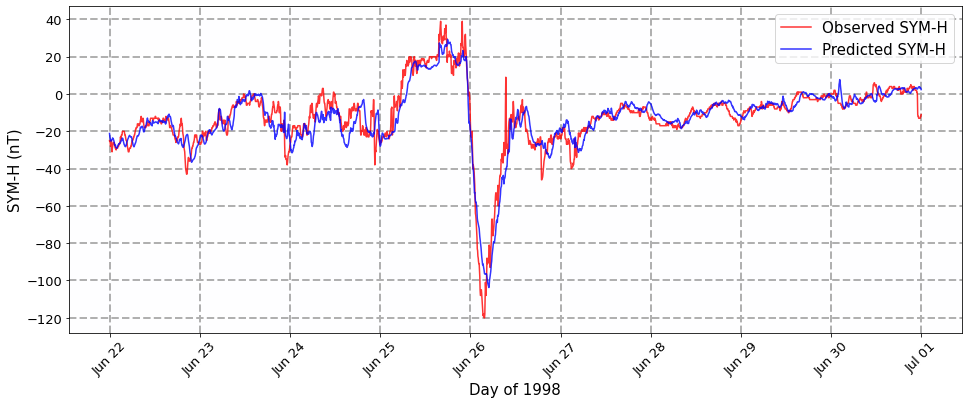

t+120


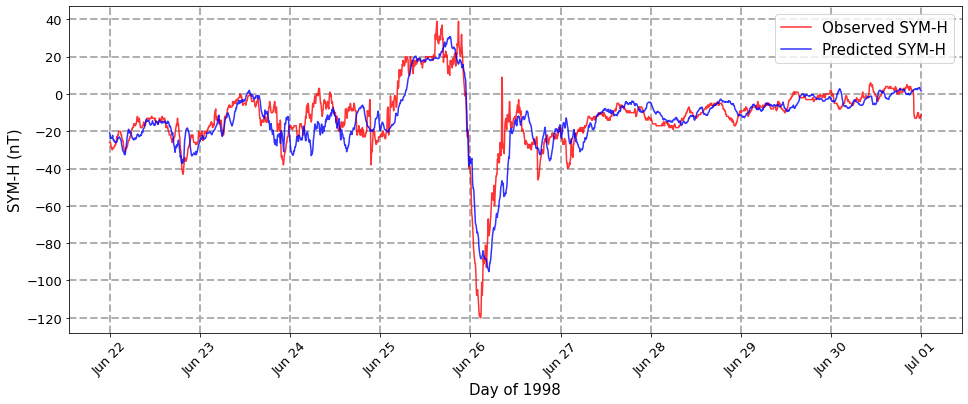

Test storm number 27, from 1998-11-02 00:00:00 until 1998-11-12 23:55:00
t+60


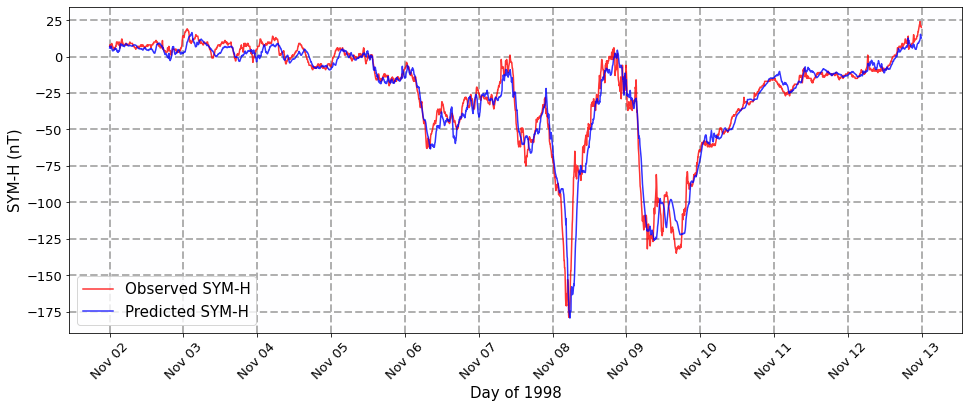

t+120


Test storm number 28, from 1999-01-09 00:00:00 until 1999-01-18 23:55:00
t+60


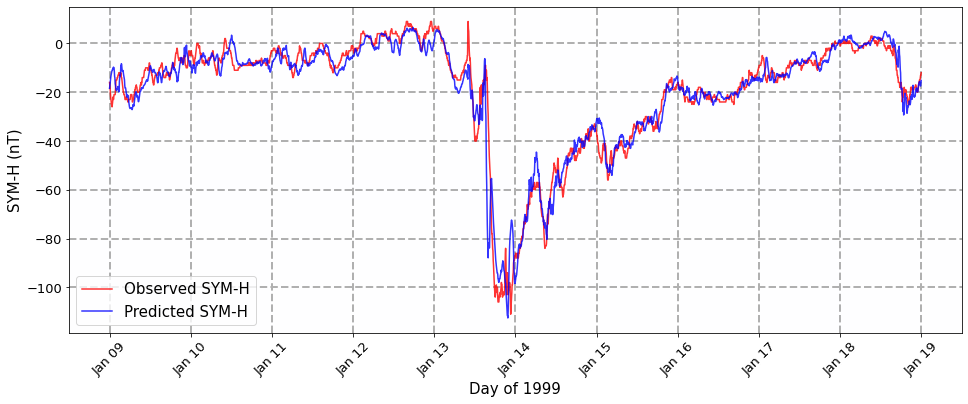

t+120


Test storm number 29, from 1999-04-13 00:00:00 until 1999-04-19 23:55:00
t+60


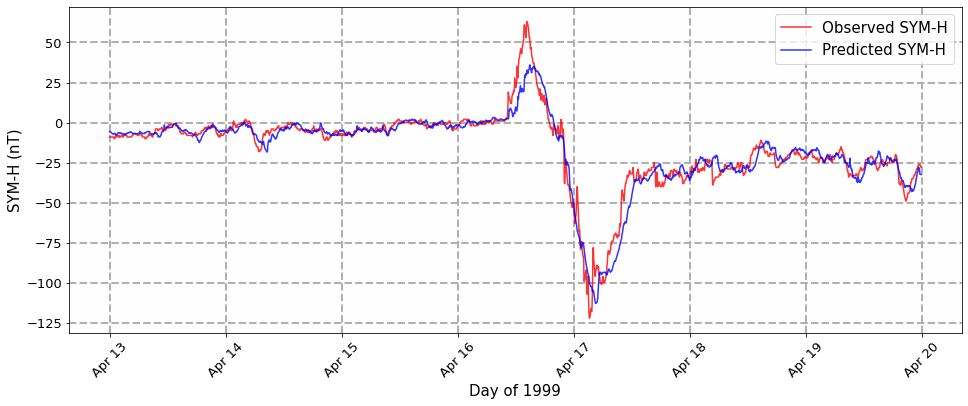

t+120


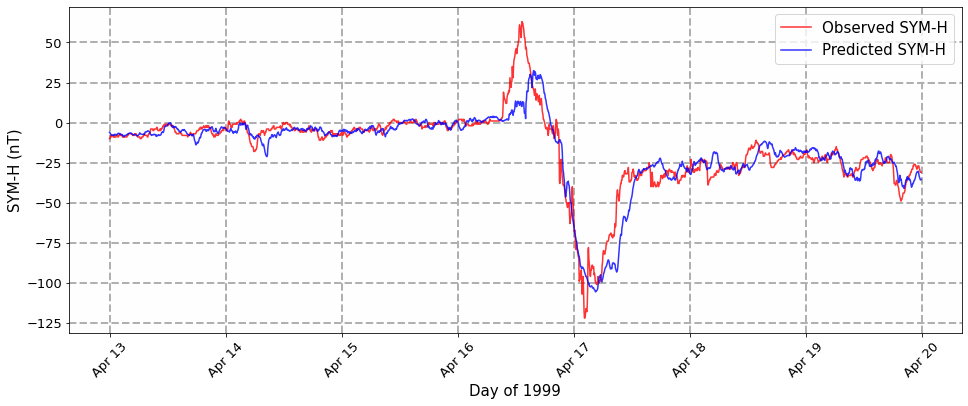

Test storm number 30, from 2000-01-16 00:00:00 until 2000-01-26 23:55:00
t+60


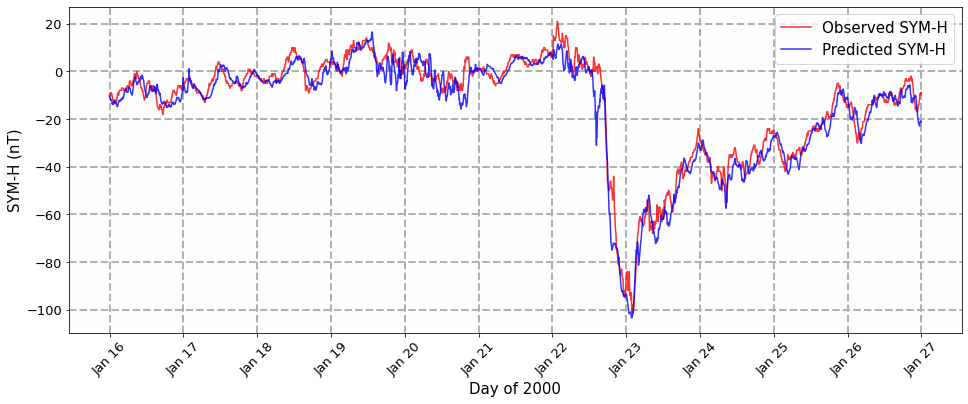

t+120


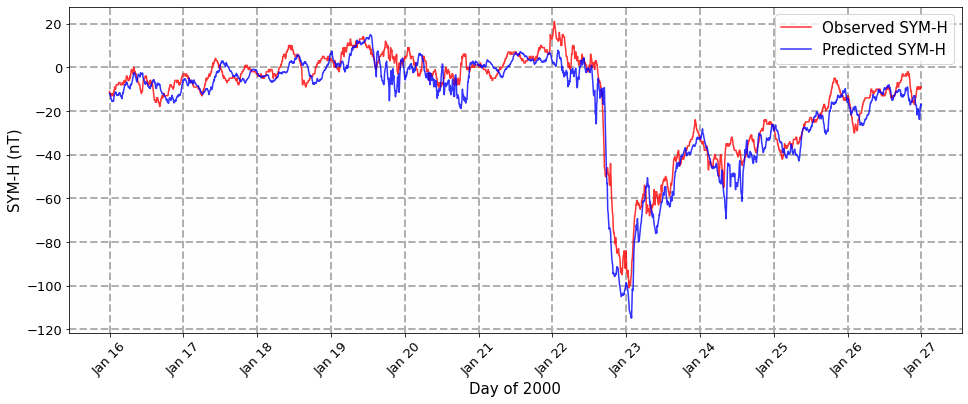

Test storm number 31, from 2000-04-02 00:00:00 until 2000-04-12 23:55:00
t+60


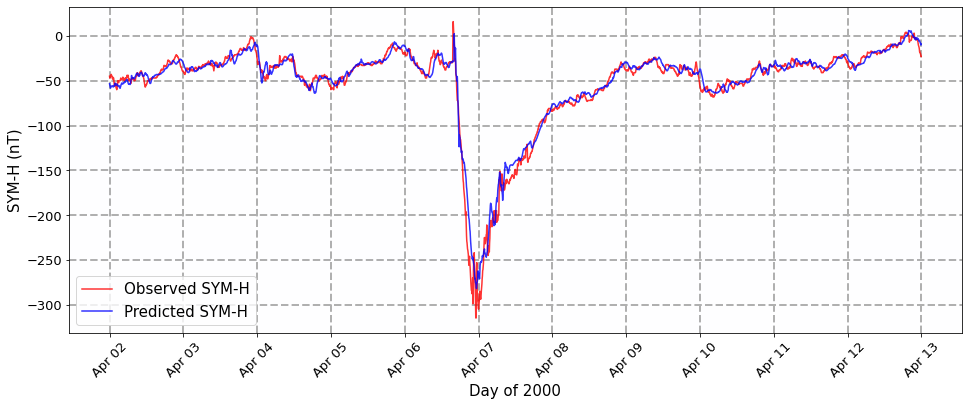

t+120


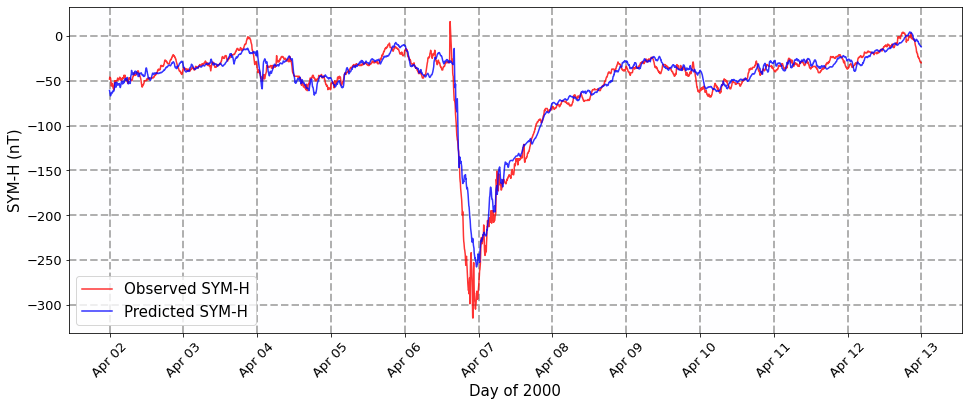

Test storm number 32, from 2000-05-19 00:00:00 until 2000-05-28 23:55:00
t+60


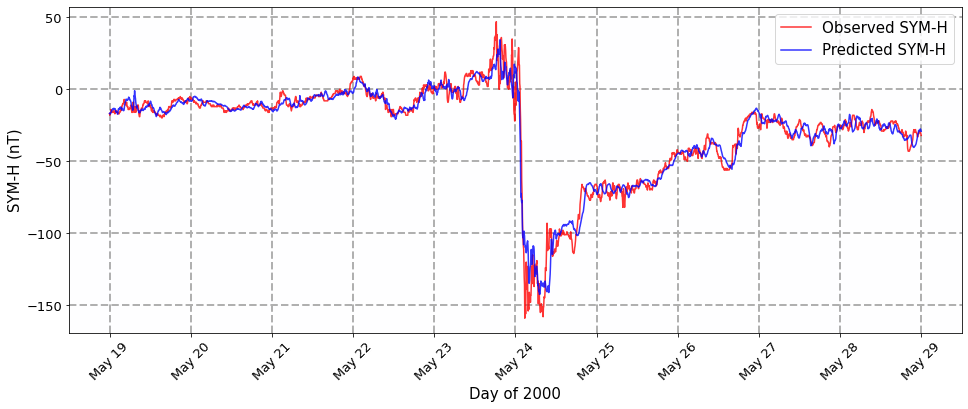

t+120


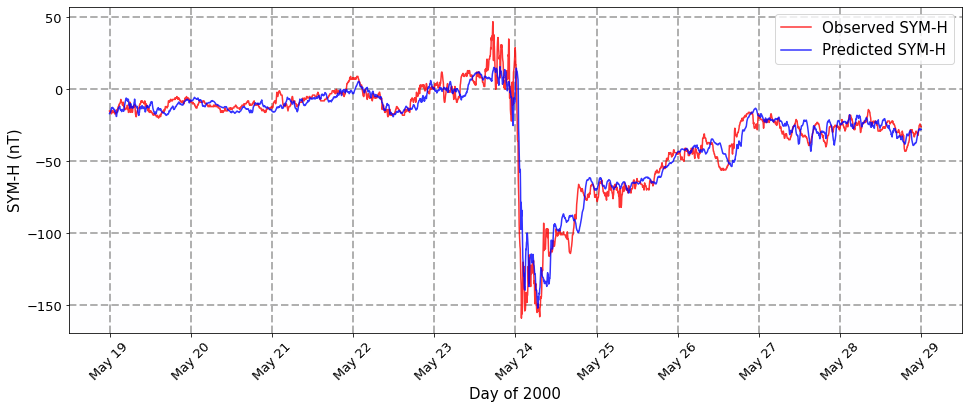

Test storm number 33, from 2001-03-26 00:00:00 until 2001-04-04 23:55:00
t+60


t+120


Test storm number 34, from 2003-05-26 00:00:00 until 2003-06-06 23:55:00
t+60


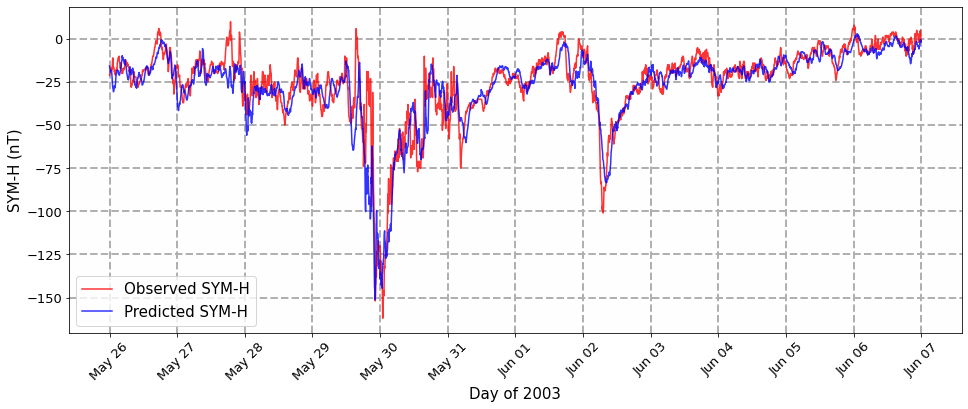

t+120


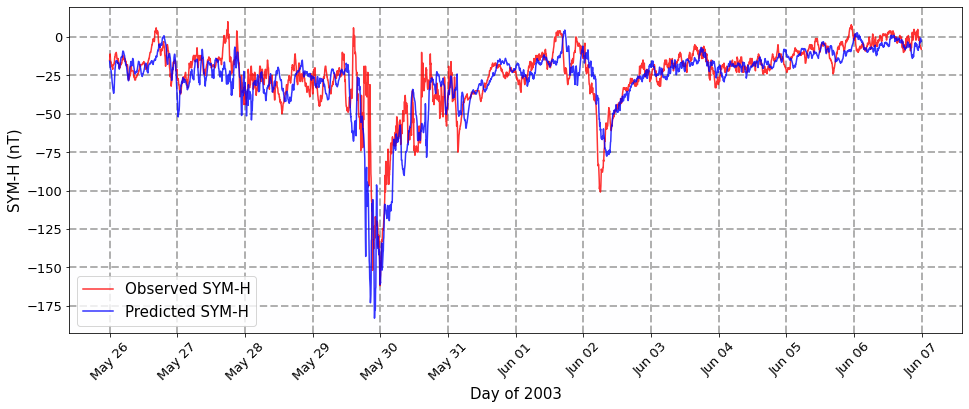

Test storm number 35, from 2003-07-08 00:00:00 until 2003-07-18 23:55:00
t+60


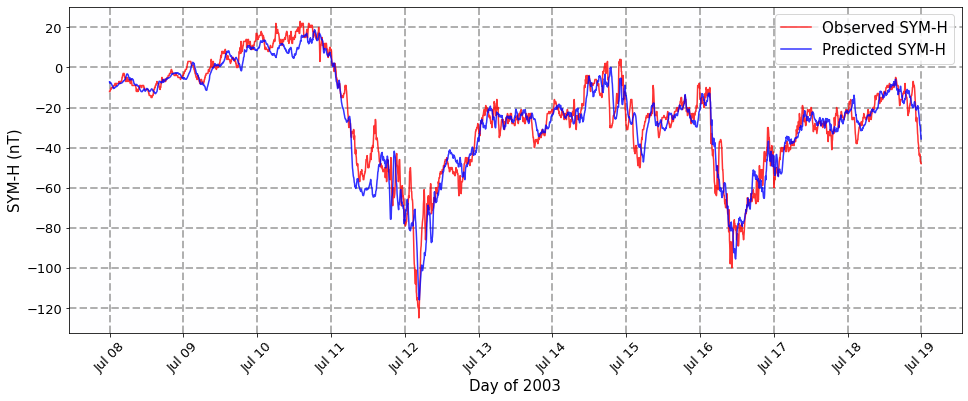

t+120


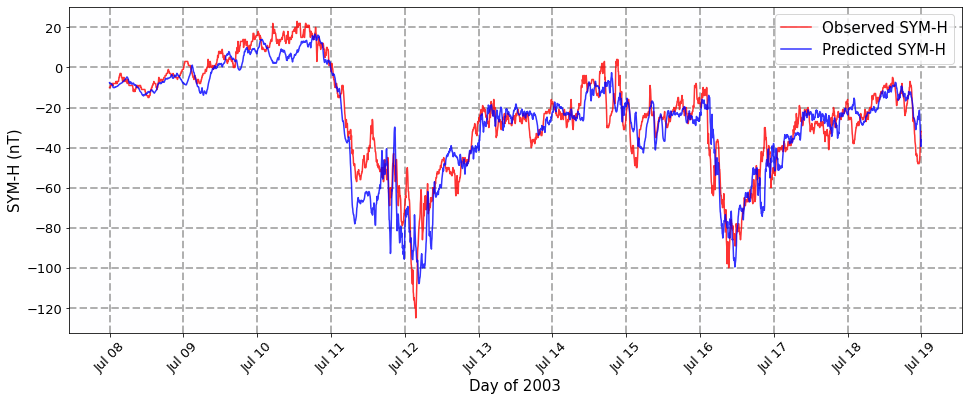

Test storm number 36, from 2004-01-18 00:00:00 until 2004-01-27 23:55:00
t+60


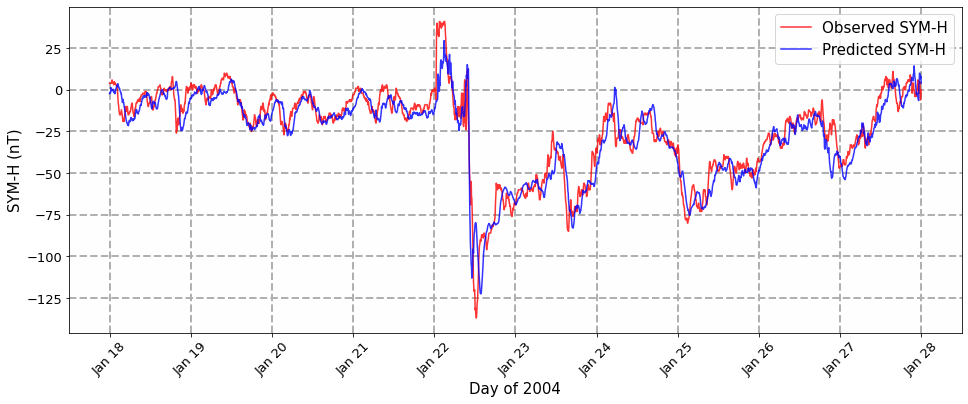

t+120


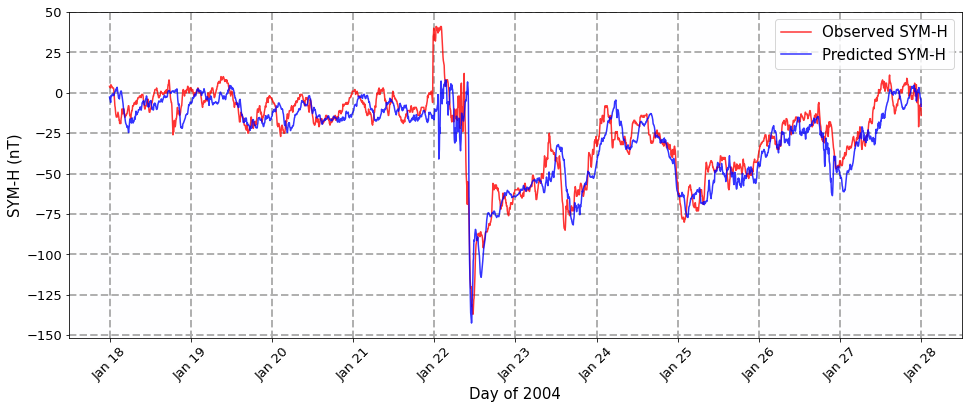

Test storm number 37, from 2004-11-04 00:00:00 until 2004-11-14 23:55:00
t+60


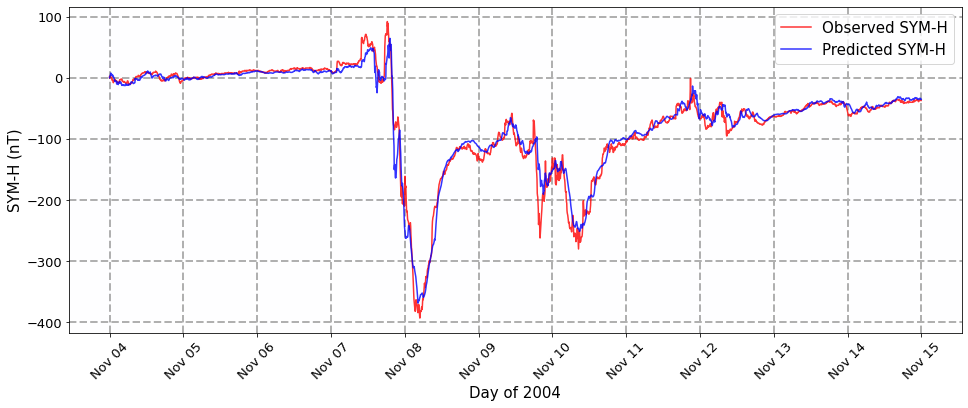

t+120


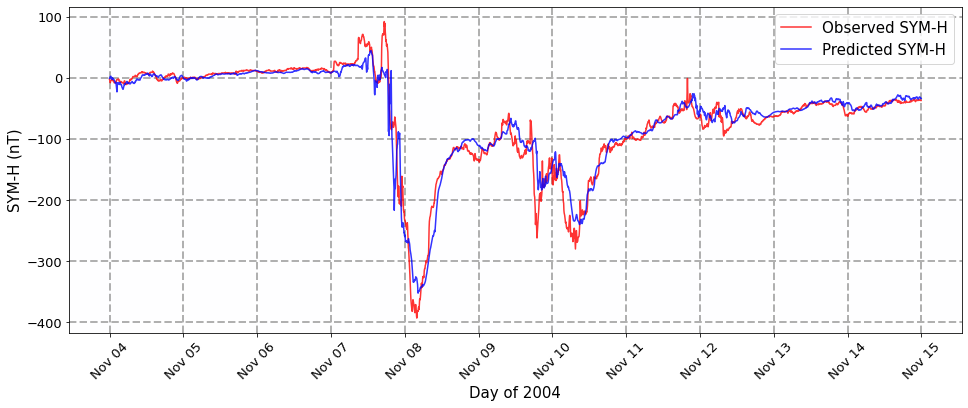

Test storm number 38, from 2012-09-10 00:00:00 until 2012-10-05 23:55:00
t+60


t+120


Test storm number 39, from 2013-05-28 00:00:00 until 2013-06-04 23:55:00
t+60


t+120


Test storm number 40, from 2013-06-26 00:00:00 until 2013-07-04 23:55:00
t+60


t+120


Test storm number 41, from 2015-03-11 00:00:00 until 2015-03-21 23:55:00
t+60


t+120


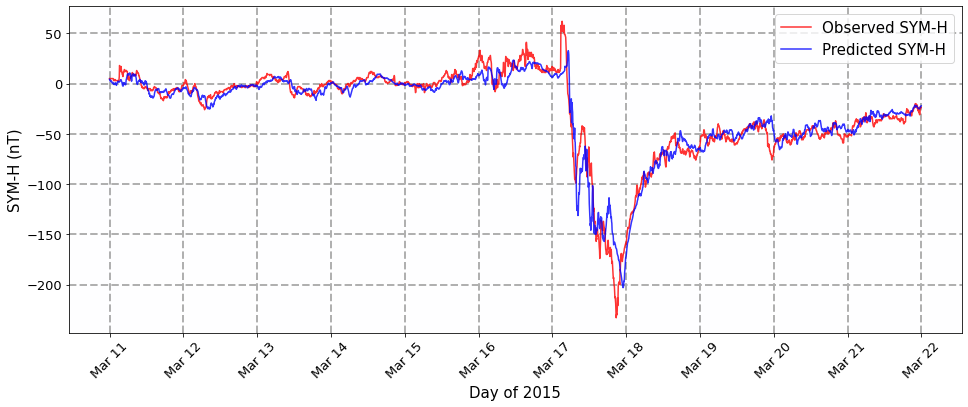

Test storm number 42, from 2018-08-22 00:00:00 until 2018-09-03 23:55:00
t+60


t+120


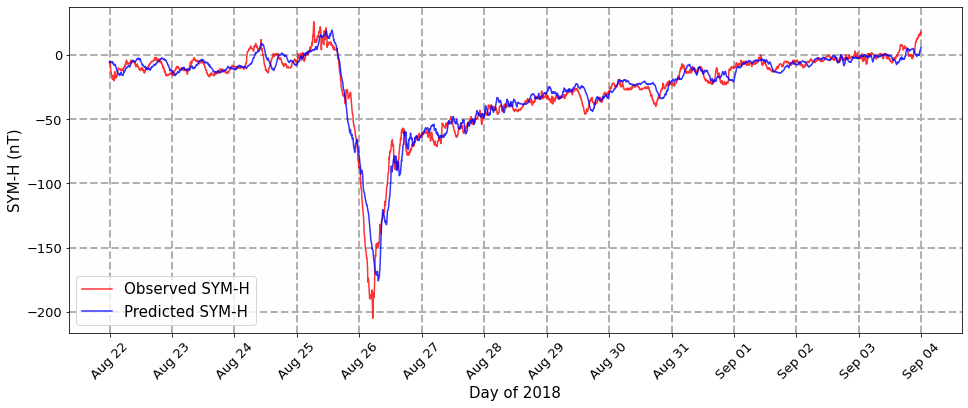

StormIndex  Baseline R2 t120  ...  Network RMSE t120  Network RMSE t60
0          26             0.549  ...              8.989             6.700
1          27             0.828  ...             13.395             8.915
2          28             0.838  ...              5.869             5.847
3          29             0.775  ...              9.291             6.670
4          30             0.891  ...              7.311             5.231
5          31             0.884  ...             12.457             8.592
6          32             0.795  ...              8.909             7.245
7          33             0.826  ...             18.422            13.320
8          34             0.551  ...             13.904            10.020
9          35             0.796  ...             10.011             7.742
10         36             0.678  ...             12.034             9.522
11         37             0.865  ...             21.008            15.156
12         38             0.802  ...              5.214             4.083
13         39             0.754  ...              6.770             6.430
14         40             0.936  ...              5.280             4.685
15         41             0.882  ...             11.665             7.872
16         42             0.898  ...              8.314             5.686
17      Mean:             0.797  ...             10.520             7.866

[18 rows x 9 columns]

In [10]:
resumen_df = pd.DataFrame(
    columns=["StormIndex"]
)

start_index_storm = 26

for storm_index, (storm_start, storm_end) in enumerate(zip(TESTING_STORMS_DATES_START_SYM, TESTING_STORMS_DATES_END_SYM)):
    start_date = pd.to_datetime(
        storm_start, format="%Y%m%d", errors="ignore"
    )
    end_date = pd.to_datetime(
        storm_end, format="%Y%m%d%H%M", errors="ignore"
    )

    print(
        f"Test storm number {storm_index + start_index_storm}, from {start_date} until {end_date}"
    )
    

    out = df_storms_sym[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["pred_SYM-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["pred_SYM-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["pred_SYM-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["pred_SYM-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["og_SYM-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["og_SYM-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_SYM-H_t+60'], color='red', alpha=0.8)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_SYM-H_t+60'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_storm_{storm_index + start_index_storm}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_SYM-H_t+120'], color='red', alpha=0.8)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_SYM-H_t+120'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_storm_{storm_index + start_index_storm}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "StormIndex": str(storm_index + start_index_storm),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "StormIndex": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

display(resumen_df)

In [11]:
resumen_df = resumen_df[['StormIndex', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
StormIndex &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
        26 &              7.652 &             6.700 &            0.827 &           0.867 &              12.325 &              8.989 &             0.549 &            0.760 \\
        27 &              9.421 &             8.915 &            0.932 &           0.939 &              15.012 &             13.395 &             0.828 &            0.863 \\
        28 &              5.852 &             5.847 &            0.936 &           0.936 &               9.307 &              5.869 &             0.838 &            0.936 \\
        29 &              7.128 &             6.670 &            0.911 &           0.922 &              11.305 &              9.291 &             0.775 &            0.848 \\
        30 &              4.794 &             5.231 &            0.954 &           0.

Testing year 2013
t+60


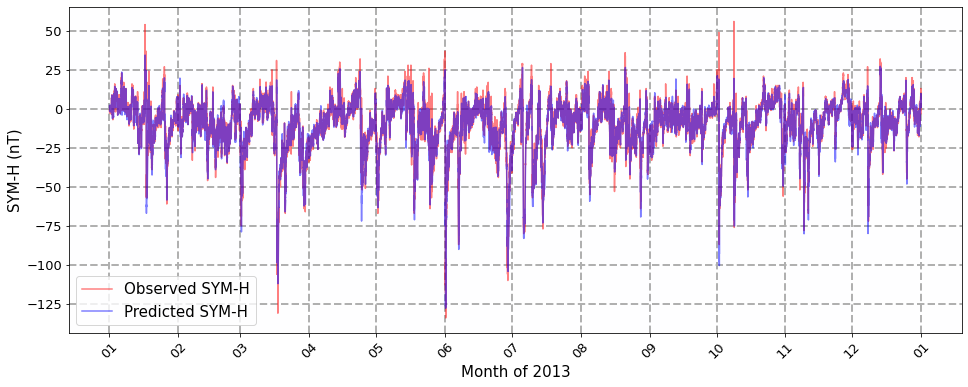

t+120


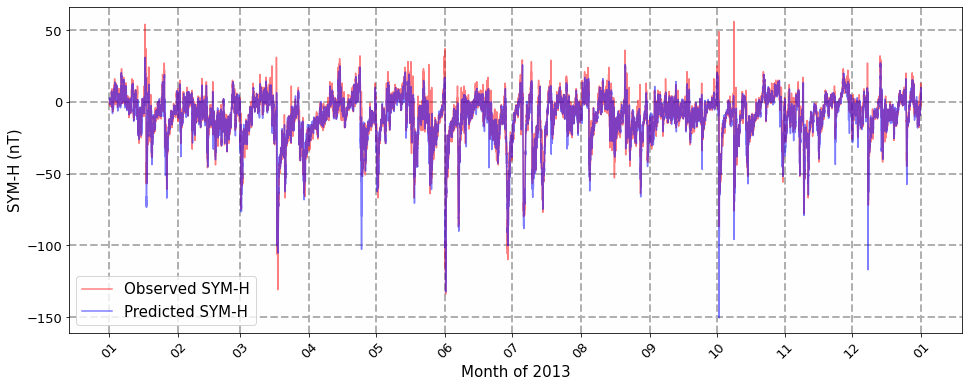

Testing year 2014
t+60


t+120


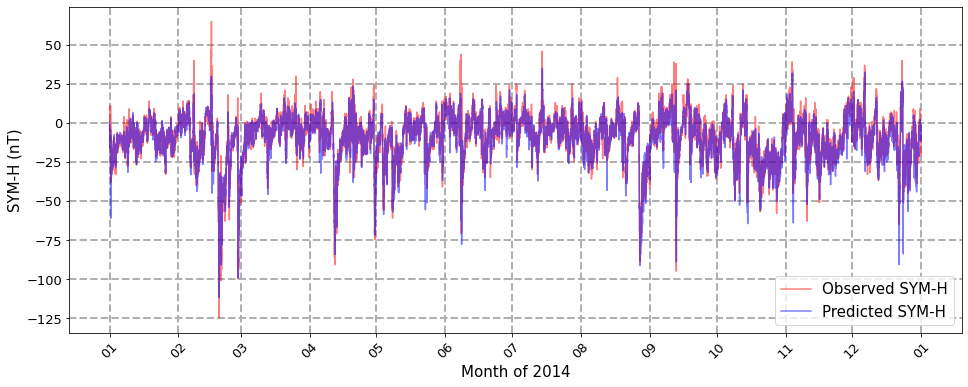

Testing year 2015
t+60


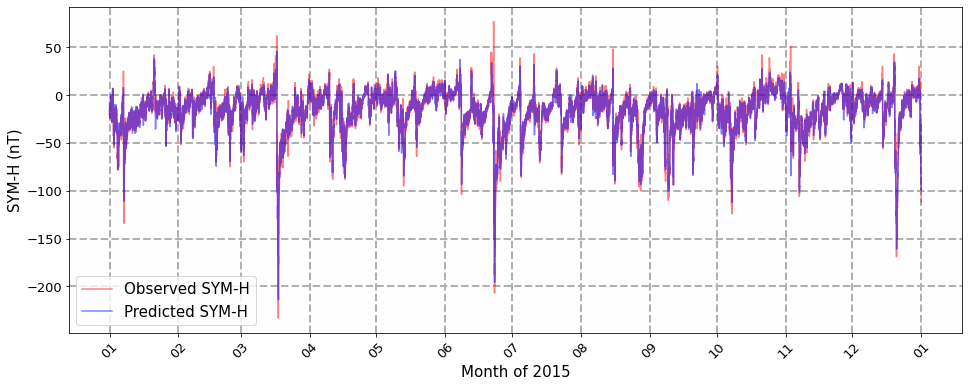

t+120


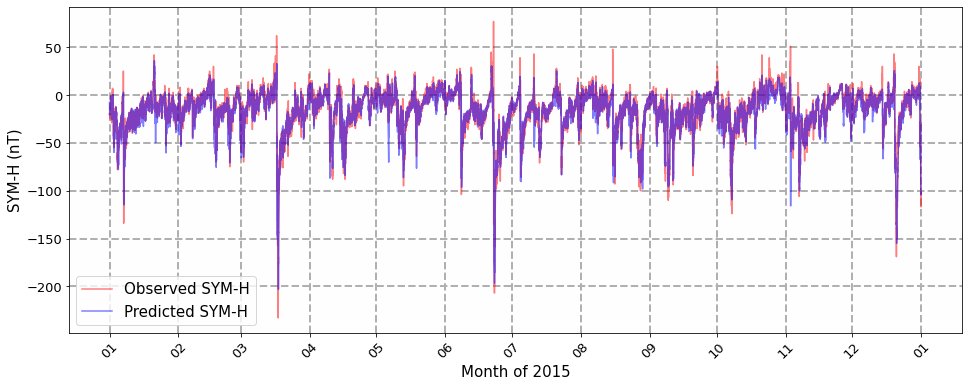

Testing year 2016
t+60


t+120


Testing year 2017
t+60


t+120


Testing year 2018
t+60


t+120


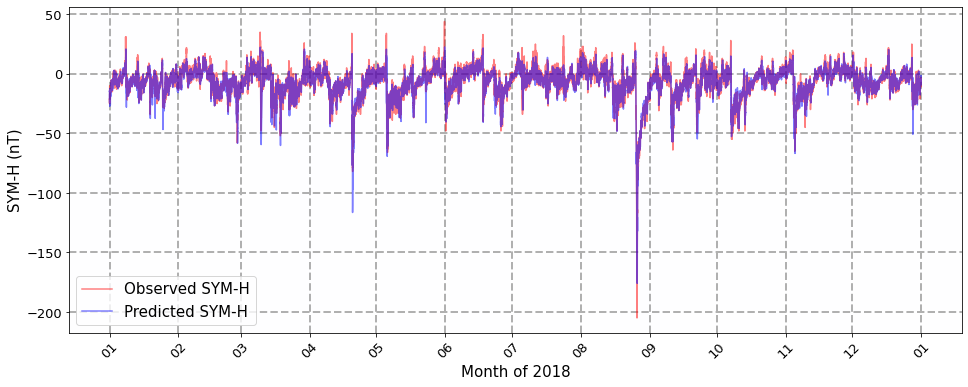

Testing year 2019
t+60


t+120


Testing year 2020
t+60


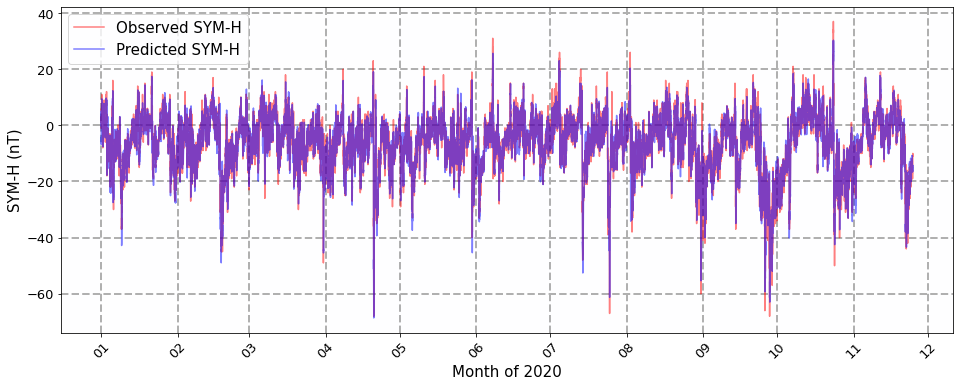

t+120


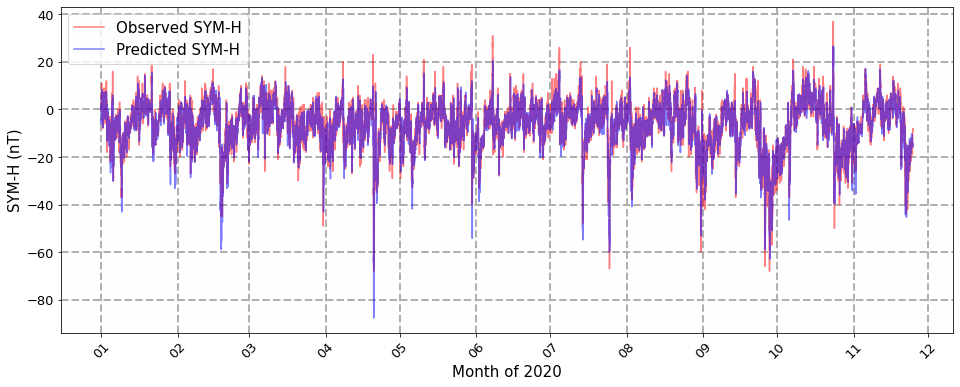

Year  Baseline RMSE t60  ...  Baseline R2 t120  Network R2 t120
0   2013              4.891  ...             0.804            0.845
1   2014              4.991  ...             0.754            0.802
2   2015              6.383  ...             0.821            0.870
3   2016              5.119  ...             0.779            0.814
4   2017              5.294  ...             0.755            0.801
5   2018              4.197  ...             0.773            0.814
6   2019              3.849  ...             0.708            0.750
7   2020              3.690  ...             0.687            0.743
8  Mean:              4.802  ...             0.760            0.805

[9 rows x 9 columns]

In [12]:
start_year = 2013
end_year = 2020

resumen_df = pd.DataFrame(
    columns=["Year"]
)

for i_year in range(end_year - start_year + 1):
    yy = i_year + start_year

    if i_year == 0:
        start_date = pd.to_datetime(
            str(start_year + i_year) + "01010320", format="%Y%m%d%H%M", errors="ignore"
        )    
    else: 
        start_date = pd.to_datetime(
            str(start_year + i_year) + "0101", format="%Y%m%d", errors="ignore"
        )
    end_date = pd.to_datetime(
        str(start_year + i_year) + "12312355", format="%Y%m%d%H%M", errors="ignore"
    )

    
    print(
        f"Testing year {yy}"
    )    

    out = df_quiet_sym[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["pred_SYM-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["pred_SYM-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["pred_SYM-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["pred_SYM-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date]["og_SYM-H_t+60"],
        out[start_date:end_date]["og_SYM-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["og_SYM-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date]["og_SYM-H_t+120"],
        out[start_date:end_date]["og_SYM-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_SYM-H_t+60'], color='red', alpha=0.5)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_SYM-H_t+60'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_quiet_year_{yy}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} SYM-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_SYM-H_t+120'], color='red', alpha=0.5)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_SYM-H_t+120'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} SYM-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_sym.round(decimals=3)) + '\nmae:  ' + str(mae_sym.round(decimals=3)) + '\ncorr:  ' + str(corr_sym.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='SYM-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed SYM-H', 'Predicted SYM-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/SYM_quiet_year_{yy}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "Year": str(yy),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "Year": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

resumen_df = resumen_df[['Year', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
display(resumen_df)

In [13]:
resumen_df = resumen_df[['Year', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
  Year &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
  2013 &              4.891 &             4.805 &            0.905 &           0.908 &               7.021 &              6.235 &             0.804 &            0.845 \\
  2014 &              4.991 &             4.983 &            0.880 &           0.881 &               7.146 &              6.421 &             0.754 &            0.802 \\
  2015 &              6.383 &             5.967 &            0.913 &           0.924 &               9.198 &              7.829 &             0.821 &            0.870 \\
  2016 &              5.119 &             5.011 &            0.893 &           0.897 &               7.327 &              6.723 &             0.779 &            0.814 \\
  2017 &              5.294 &             5.135 &            0.881 &           0.888 &               7.58

Test storm number 26, from 1998-06-22 00:00:00 until 1998-06-30 23:55:00
t+60


t+120


Test storm number 27, from 1998-11-02 00:00:00 until 1998-11-12 23:55:00
t+60


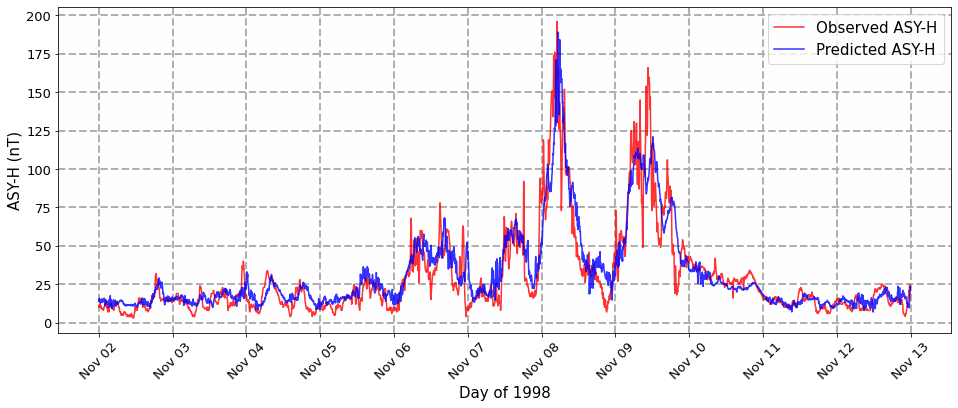

t+120


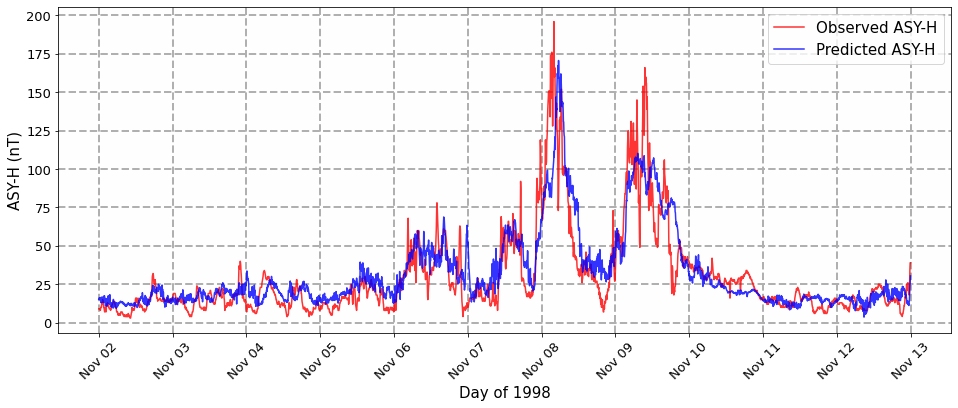

Test storm number 28, from 1999-01-09 00:00:00 until 1999-01-18 23:55:00
t+60


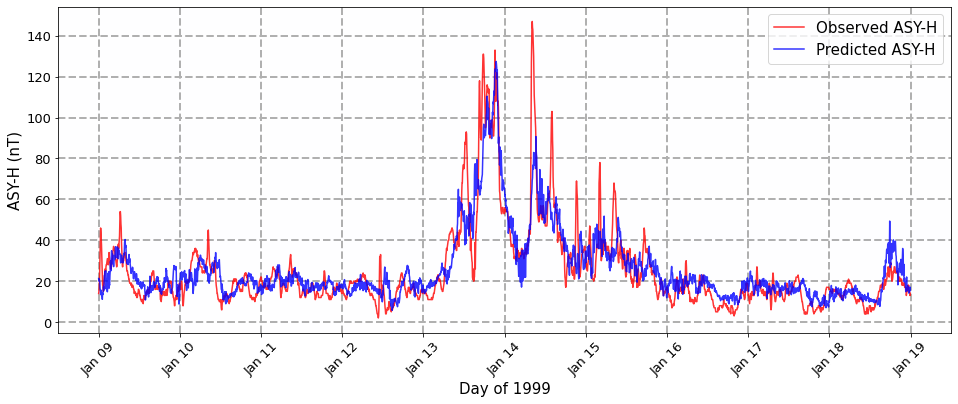

t+120


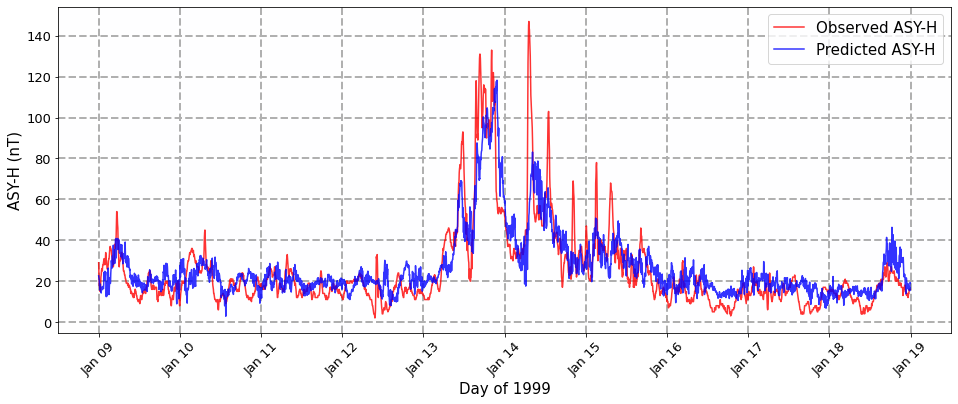

Test storm number 29, from 1999-04-13 00:00:00 until 1999-04-19 23:55:00
t+60


t+120


Test storm number 30, from 2000-01-16 00:00:00 until 2000-01-26 23:55:00
t+60


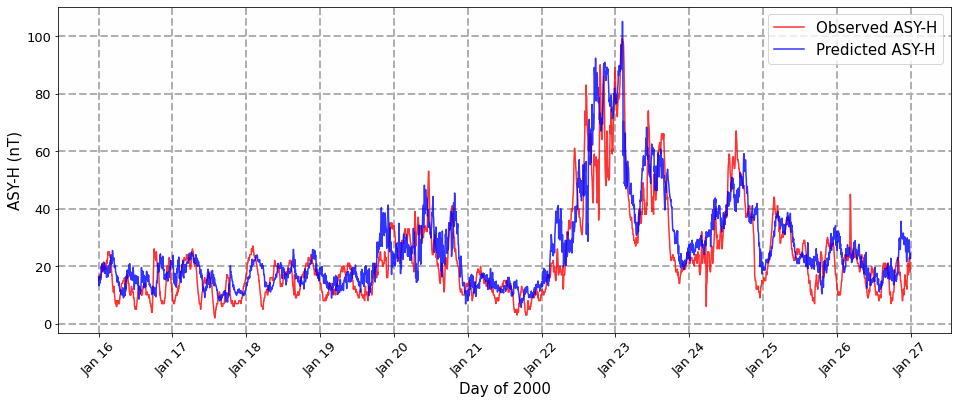

t+120


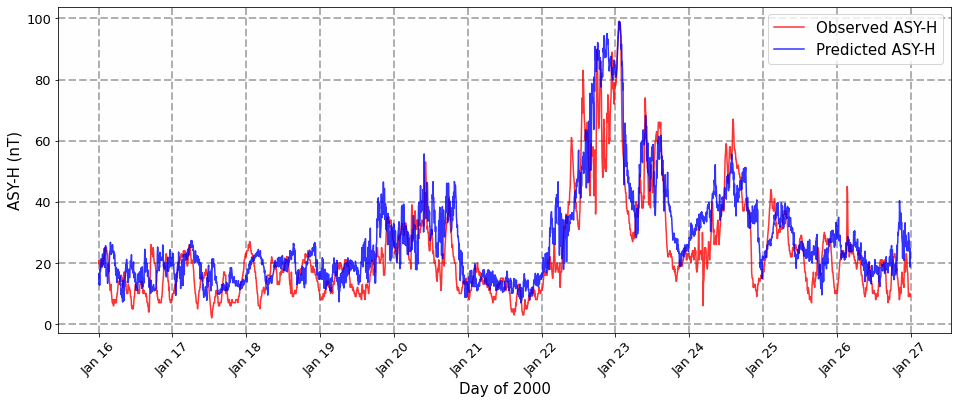

Test storm number 31, from 2000-04-02 00:00:00 until 2000-04-12 23:55:00
t+60


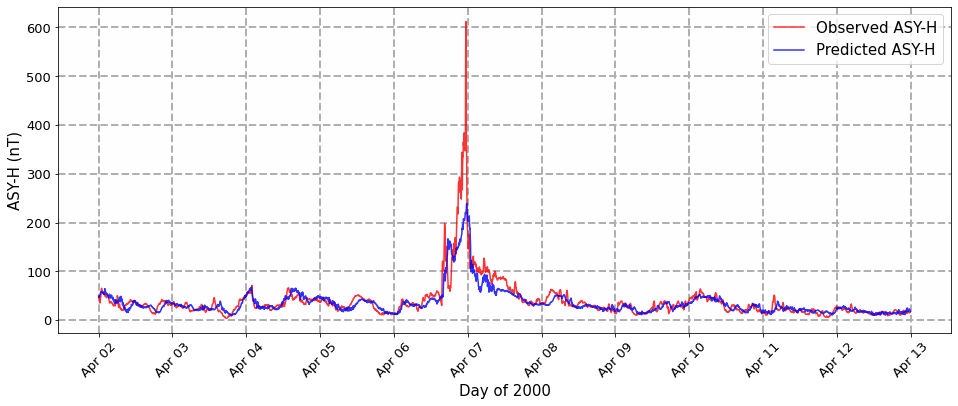

t+120


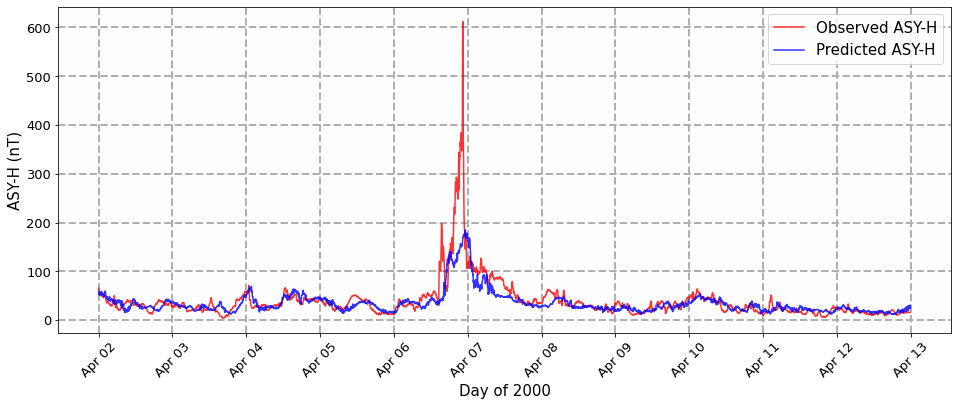

Test storm number 32, from 2000-05-19 00:00:00 until 2000-05-28 23:55:00
t+60


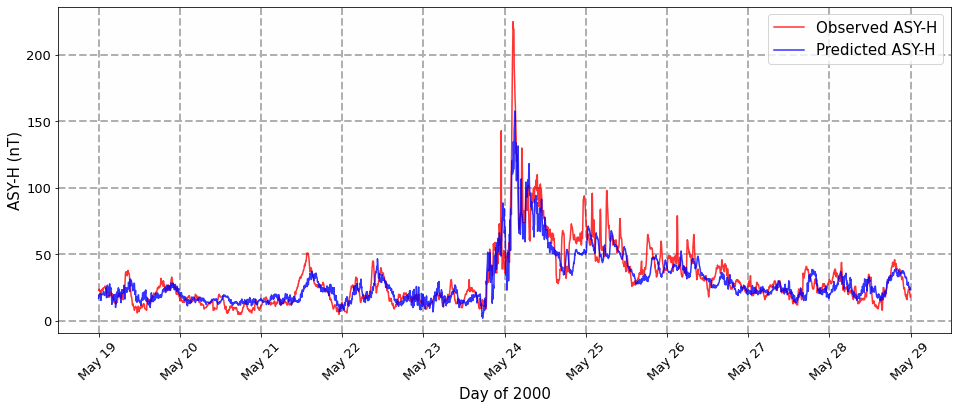

t+120


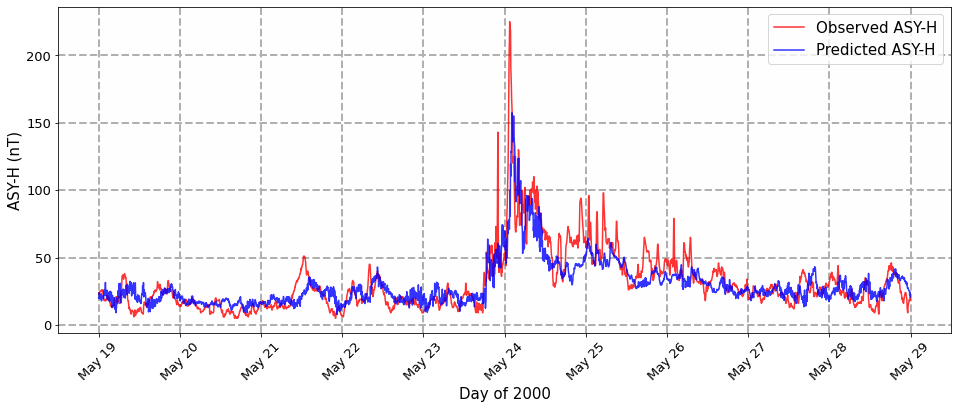

Test storm number 33, from 2001-03-26 00:00:00 until 2001-04-04 23:55:00
t+60


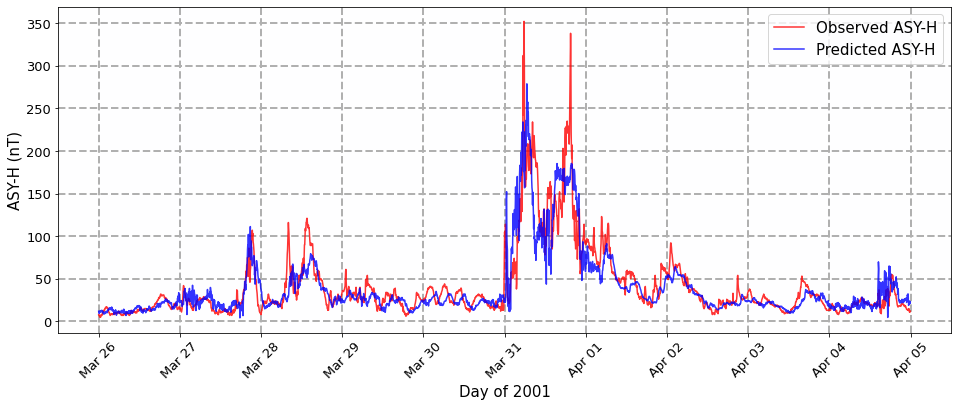

t+120


Test storm number 34, from 2003-05-26 00:00:00 until 2003-06-06 23:55:00
t+60


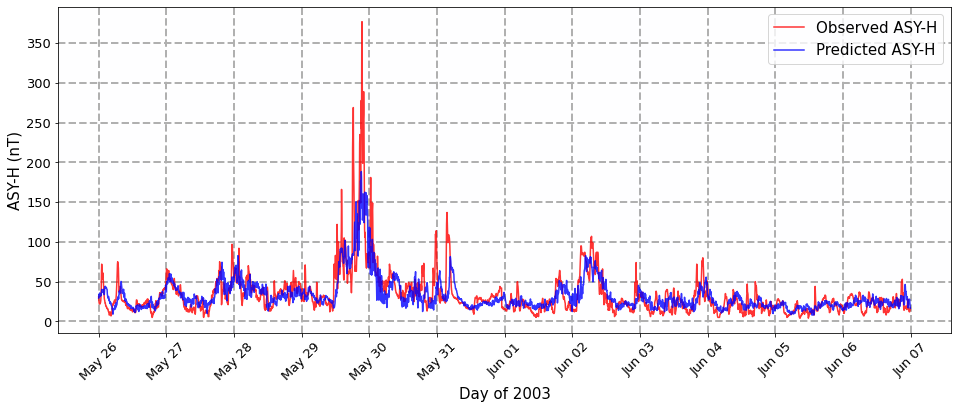

t+120


Test storm number 35, from 2003-07-08 00:00:00 until 2003-07-18 23:55:00
t+60


t+120


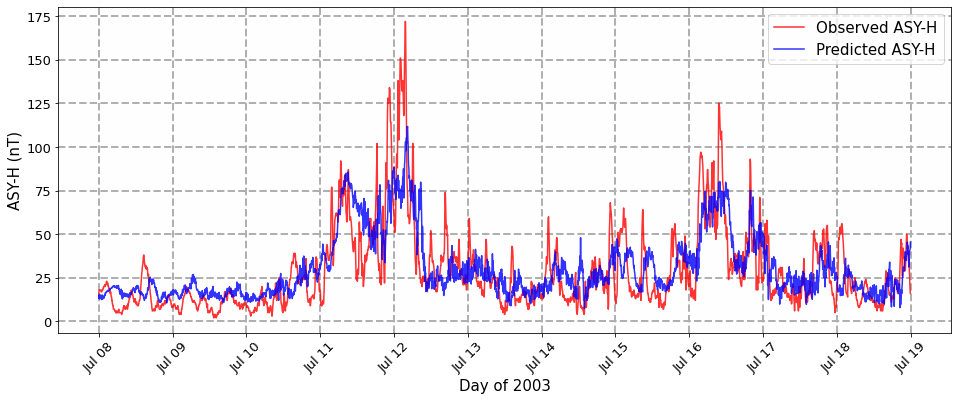

Test storm number 36, from 2004-01-18 00:00:00 until 2004-01-27 23:55:00
t+60


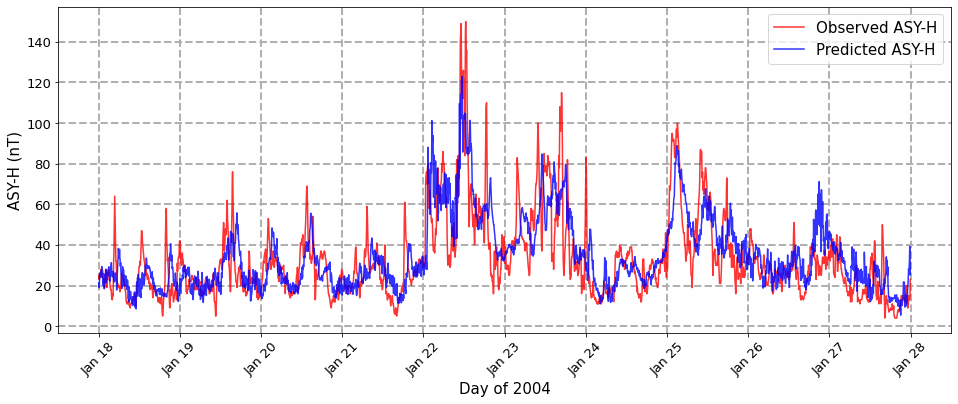

t+120


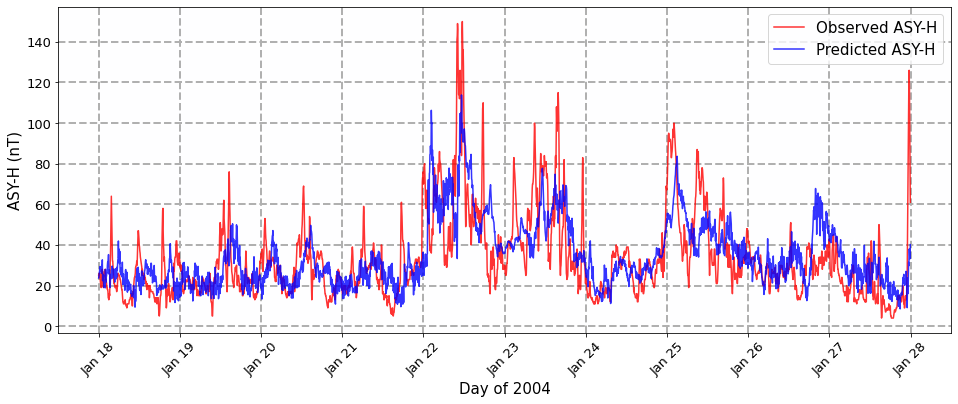

Test storm number 37, from 2004-11-04 00:00:00 until 2004-11-14 23:55:00
t+60


t+120


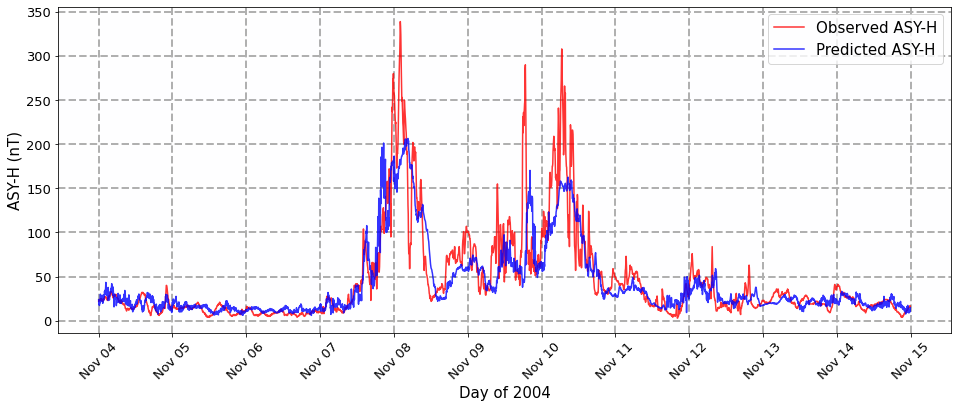

Test storm number 38, from 2012-09-10 00:00:00 until 2012-10-05 23:55:00
t+60


t+120


Test storm number 39, from 2013-05-28 00:00:00 until 2013-06-04 23:55:00
t+60


t+120


Test storm number 40, from 2013-06-26 00:00:00 until 2013-07-04 23:55:00
t+60


t+120


Test storm number 41, from 2015-03-11 00:00:00 until 2015-03-21 23:55:00
t+60


t+120


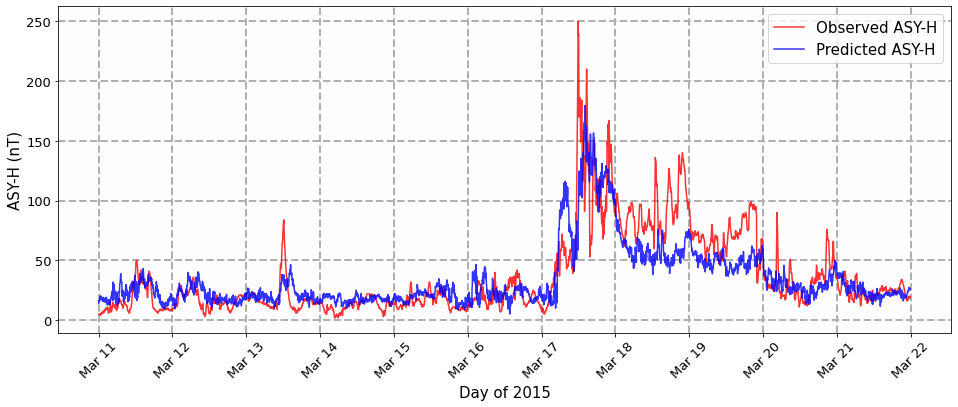

Test storm number 42, from 2018-08-22 00:00:00 until 2018-09-03 23:55:00
t+60


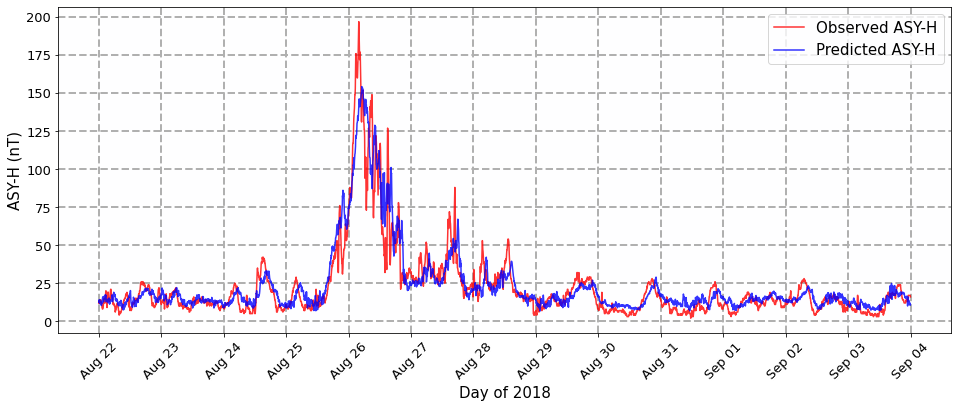

t+120


StormIndex  Baseline R2 t120  ...  Network RMSE t120  Network RMSE t60
0          26             0.285  ...             10.302             8.710
1          27             0.604  ...             14.881            12.504
2          28             0.360  ...             11.581            10.421
3          29             0.581  ...             10.873             9.100
4          30             0.527  ...              9.912             8.908
5          31             0.444  ...             26.041            21.136
6          32             0.412  ...             13.270            11.246
7          33             0.555  ...             20.193            18.839
8          34            -0.024  ...             21.365            18.908
9          35             0.209  ...             16.241            13.958
10         36             0.008  ...             16.711            14.114
11         37             0.587  ...             27.430            23.072
12         38             0.323  ...              8.214             7.340
13         39             0.463  ...             10.377            10.629
14         40             0.712  ...              9.862             9.175
15         41             0.611  ...             20.308            17.899
16         42             0.689  ...             11.111             9.932
17      Mean:             0.432  ...             15.216            13.288

[18 rows x 9 columns]

In [14]:
resumen_df = pd.DataFrame(
    columns=["StormIndex"]
)

start_index_storm = 26

for storm_index, (storm_start, storm_end) in enumerate(zip(TESTING_STORMS_DATES_START_ASY, TESTING_STORMS_DATES_END_ASY)):
    start_date = pd.to_datetime(
        storm_start, format="%Y%m%d", errors="ignore"
    )
    end_date = pd.to_datetime(
        storm_end, format="%Y%m%d%H%M", errors="ignore"
    )

    print(
        f"Test storm number {storm_index + start_index_storm}, from {start_date} until {end_date}"
    )
    

    out = df_storms_asy[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["pred_ASY-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["pred_ASY-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["pred_ASY-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["pred_ASY-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["og_ASY-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["og_ASY-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_ASY-H_t+60'], color='red', alpha=0.8)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_ASY-H_t+60'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_storm_{storm_index + start_index_storm}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_ASY-H_t+120'], color='red', alpha=0.8)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_ASY-H_t+120'], color='blue', alpha=0.8)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Day of ' + str(start_date.year)
    axs.set(xlabel=xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.DayLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_storm_{storm_index + start_index_storm}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "StormIndex": str(storm_index + start_index_storm),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "StormIndex": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

display(resumen_df)

In [15]:
resumen_df = resumen_df[['StormIndex', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
StormIndex &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
        26 &              9.148 &             8.710 &            0.680 &           0.710 &              13.666 &             10.302 &             0.285 &            0.594 \\
        27 &             13.328 &            12.504 &            0.787 &           0.813 &              18.164 &             14.881 &             0.604 &            0.734 \\
        28 &             12.849 &            10.421 &            0.621 &           0.751 &              16.698 &             11.581 &             0.360 &            0.692 \\
        29 &              9.428 &             9.100 &            0.787 &           0.802 &              13.227 &             10.873 &             0.581 &            0.717 \\
        30 &              8.011 &             8.908 &            0.753 &           0.

Testing year 2013, 2013-01-01 00:00:00, 2013-12-31 23:55:00
t+60


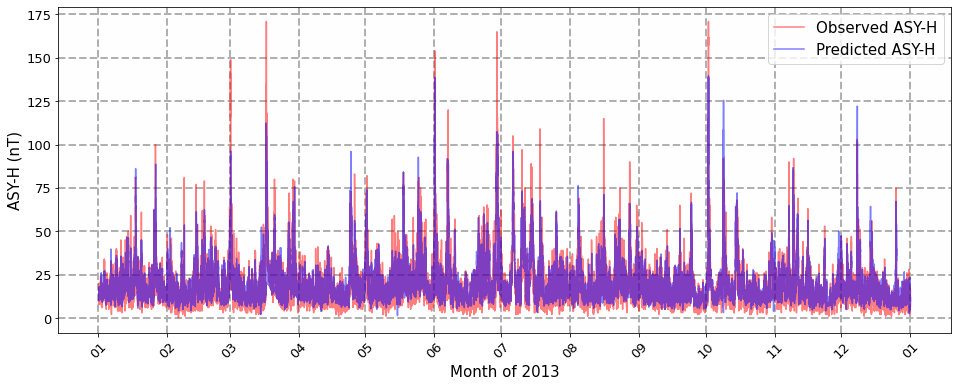

t+120


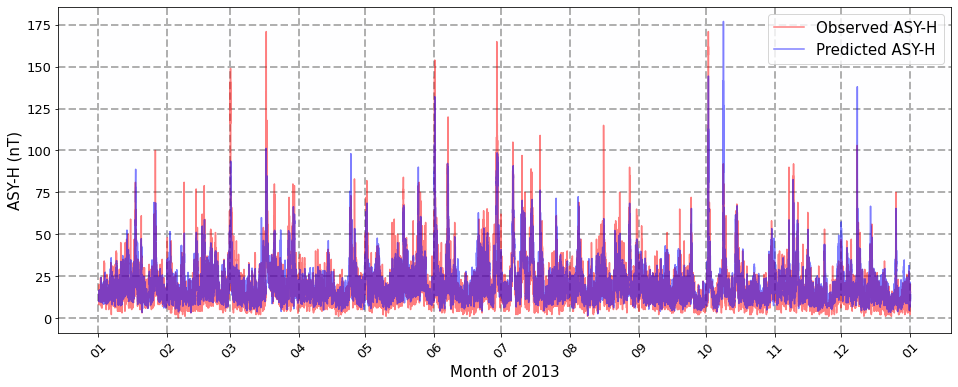

Testing year 2014, 2014-01-01 00:00:00, 2014-12-31 23:55:00
t+60


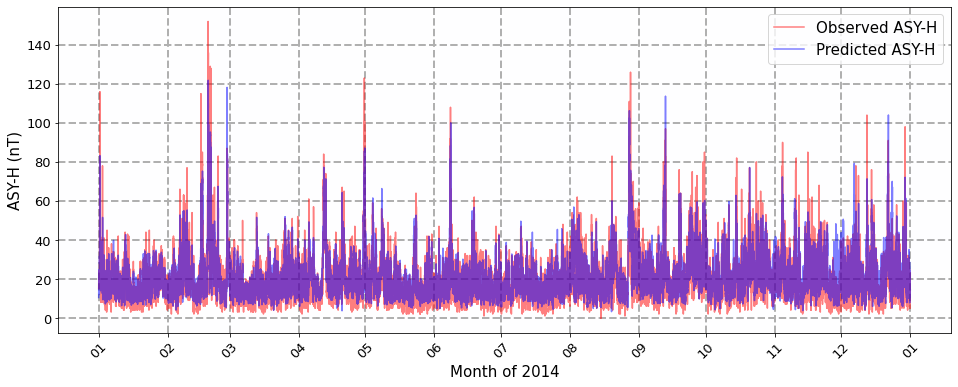

t+120


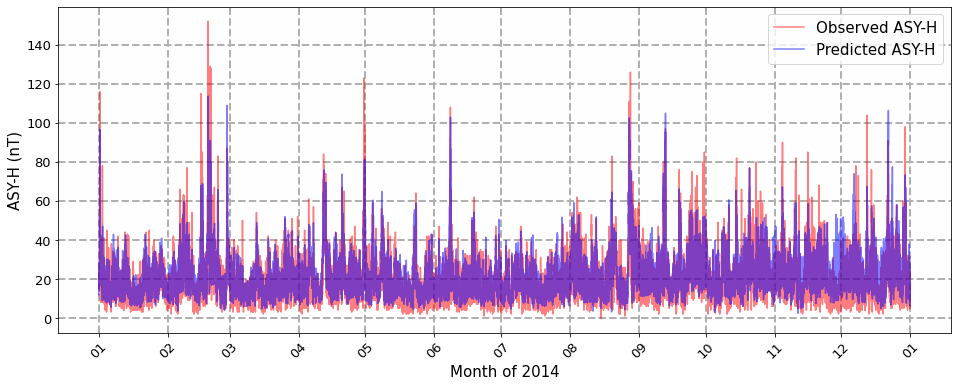

Testing year 2015, 2015-01-01 00:00:00, 2015-12-31 23:55:00
t+60


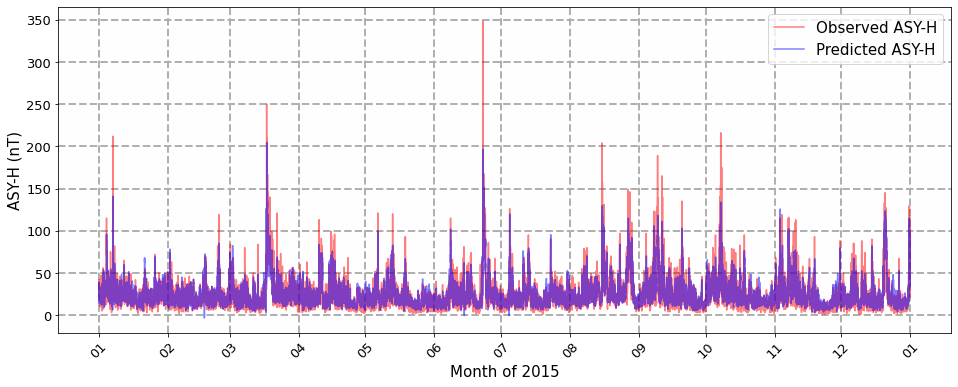

t+120


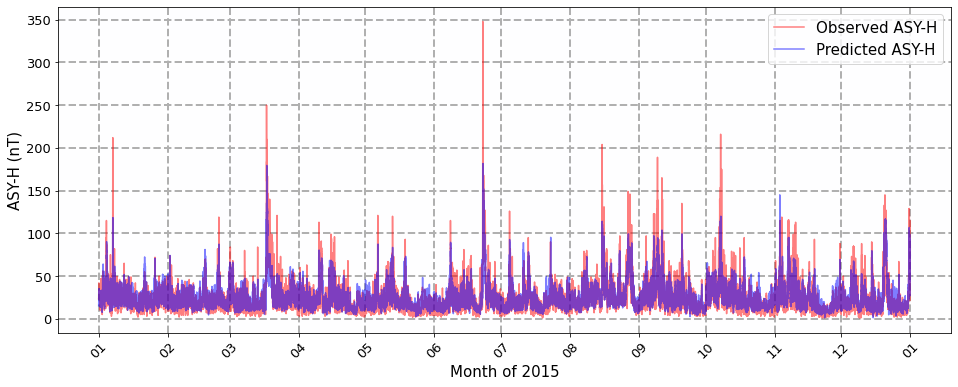

Testing year 2016, 2016-01-01 00:00:00, 2016-12-31 23:55:00
t+60


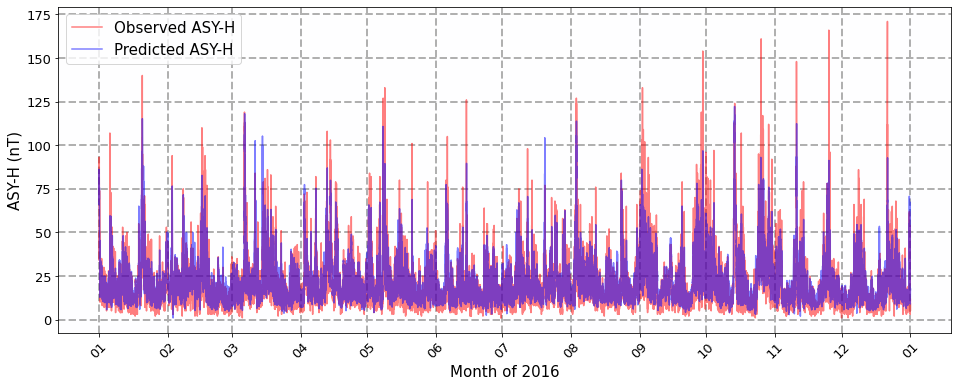

t+120


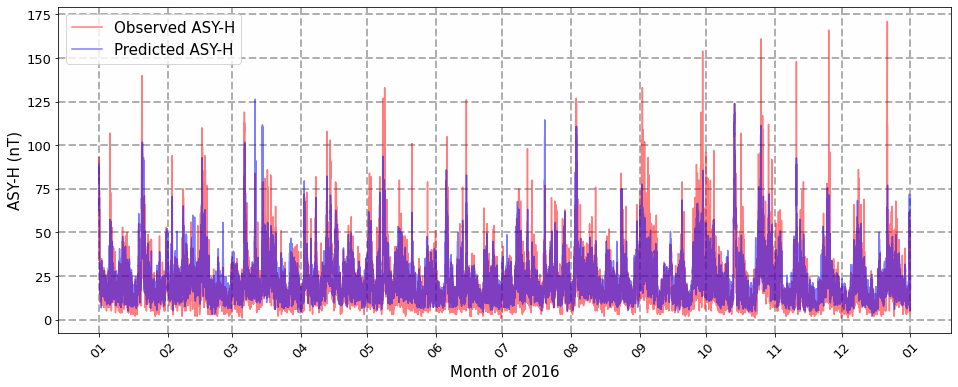

Testing year 2017, 2017-01-01 00:00:00, 2017-12-31 23:55:00
t+60


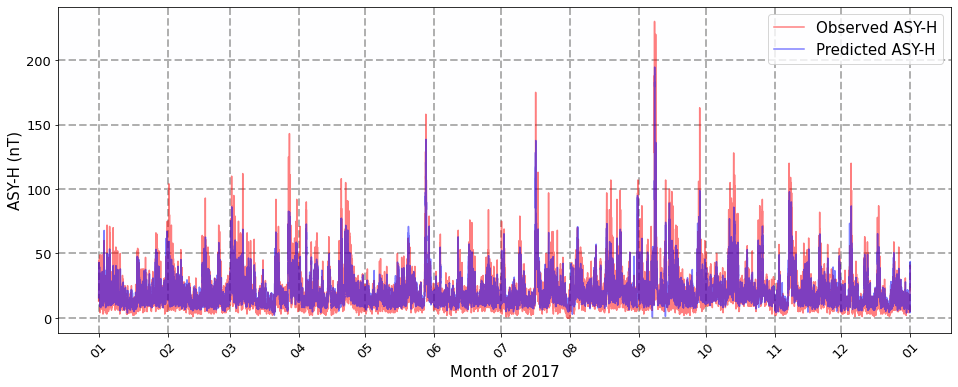

t+120


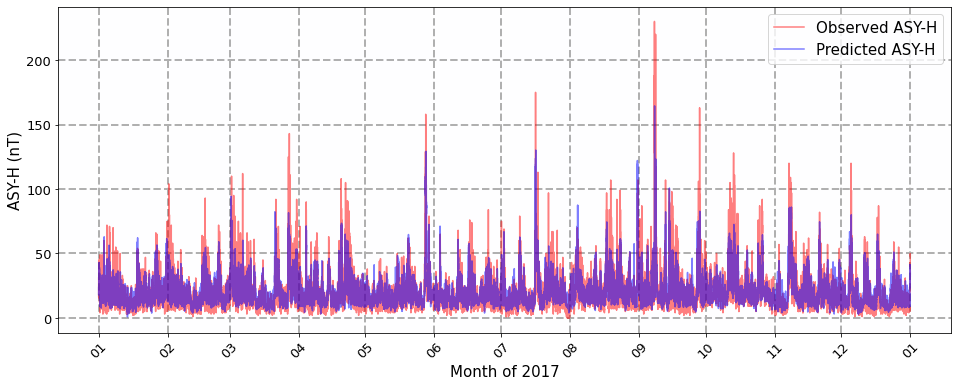

Testing year 2018, 2018-01-01 00:00:00, 2018-12-31 23:55:00
t+60


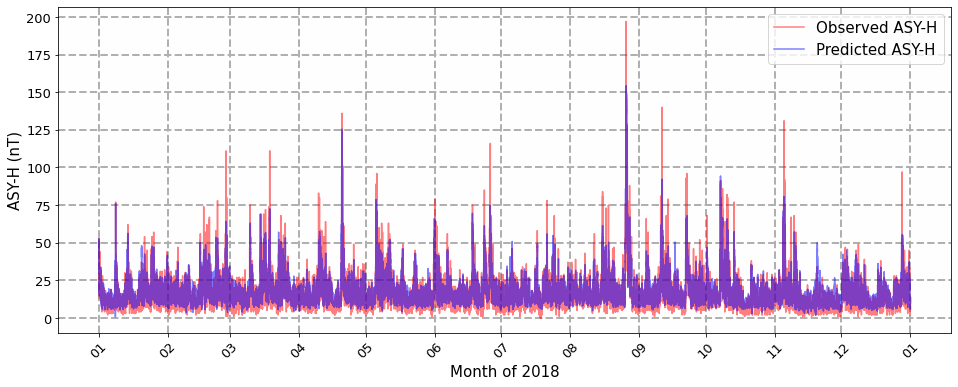

t+120


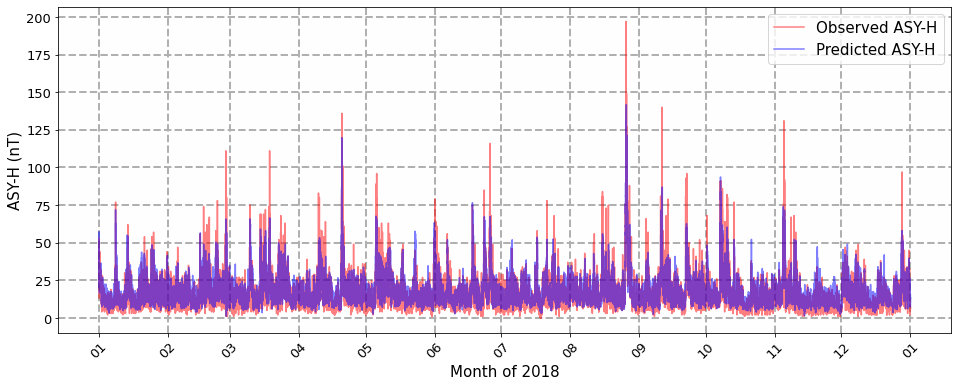

Testing year 2019, 2019-01-01 00:00:00, 2019-12-31 23:55:00
t+60


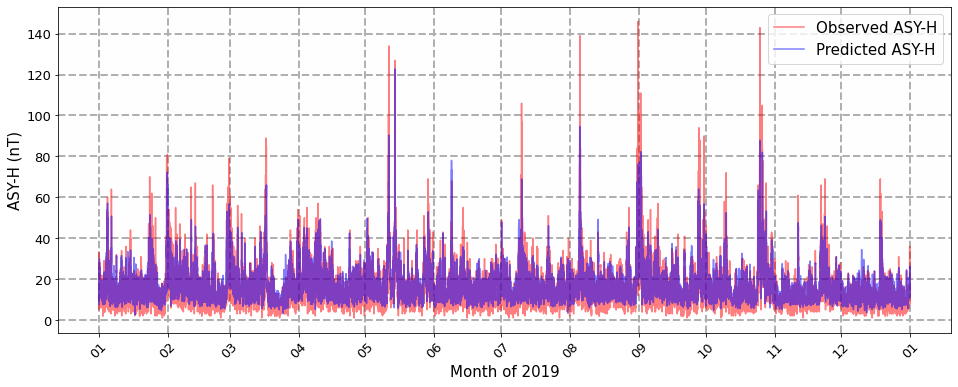

t+120


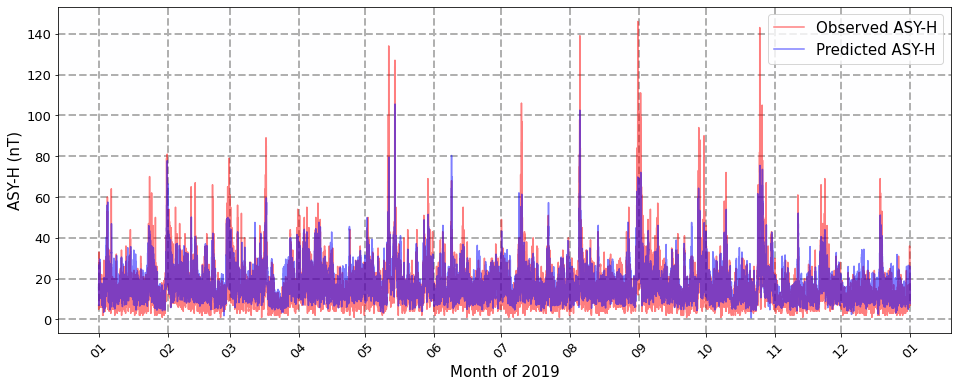

Testing year 2020, 2020-01-01 00:00:00, 2020-12-31 23:55:00
t+60


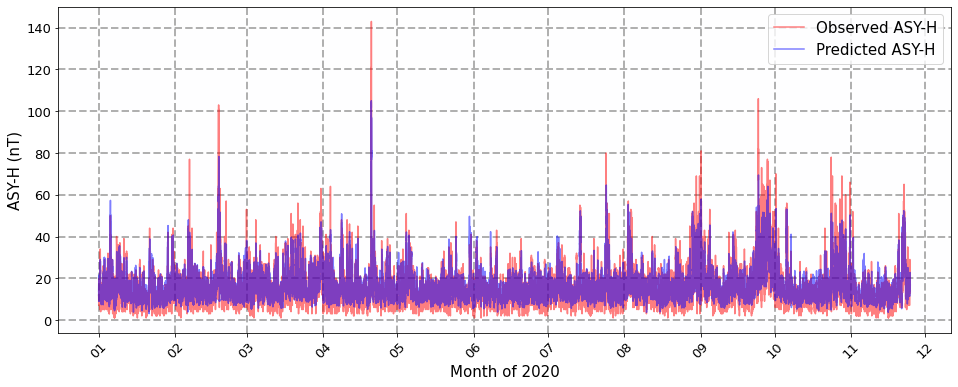

t+120


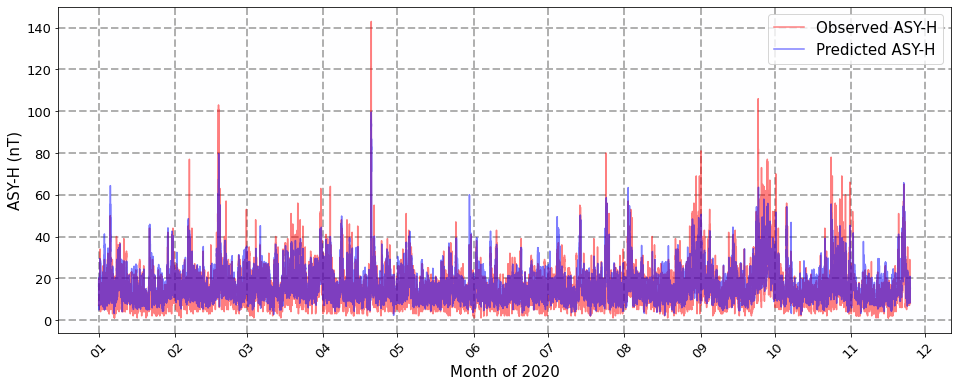

Year  Baseline RMSE t60  ...  Baseline R2 t120  Network R2 t120
0   2013              8.310  ...             0.287            0.477
1   2014              8.264  ...             0.119            0.292
2   2015             11.643  ...             0.364            0.542
3   2016             10.604  ...             0.153            0.394
4   2017             10.648  ...             0.115            0.415
5   2018              7.990  ...             0.178            0.419
6   2019              7.532  ...             0.088            0.327
7   2020              6.579  ...             0.058            0.250
8  Mean:              8.946  ...             0.170            0.390

[9 rows x 9 columns]

In [16]:
start_year = 2013
end_year = 2020

resumen_df = pd.DataFrame(
    columns=["Year"]
)

for i_year in range(end_year - start_year + 1):
    yy = i_year + start_year

    start_date = pd.to_datetime(
        str(start_year + i_year) + "0101", format="%Y%m%d", errors="ignore"
    )
    end_date = pd.to_datetime(
        str(start_year + i_year) + "12312355", format="%Y%m%d%H%M", errors="ignore"
    )

    
    print(
        f"Testing year {yy}, {start_date}, {end_date}"
    )    

    out = df_quiet_asy[start_date : end_date].copy()

    rmse_60 = msem(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["pred_ASY-H_t+60"],
        squared=False,
    )
    r2_60 = r2m(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["pred_ASY-H_t+60"],
    )

    rmse_120 = msem(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["pred_ASY-H_t+120"],
        squared=False,
    )
    r2_120 = r2m(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["pred_ASY-H_t+120"],
    )

    rmse_base_60 = msem(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_60 = r2m(
        out[start_date:end_date]["og_ASY-H_t+60"],
        out[start_date:end_date]["og_ASY-H_t0"],
    )

    rmse_base_120 = msem(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["og_ASY-H_t0"],
        squared=False,
    )
    r2_base_120 = r2m(
        out[start_date:end_date]["og_ASY-H_t+120"],
        out[start_date:end_date]["og_ASY-H_t0"],
    )
    print('t+60')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_ASY-H_t+60'], color='red', alpha=0.5)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_ASY-H_t+60'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_quiet_year_{yy}_t60.png');


    plt.show();
    print('t+120')

    fig, axs = plt.subplots(figsize=(16,6))
    #fig.suptitle('desde {} hasta {} ASY-H index'.format(start_date, end_date), fontsize=120)

    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['og_ASY-H_t+120'], color='red', alpha=0.5)
    axs.plot(out[start_date:end_date].index, out[start_date:end_date]['pred_ASY-H_t+120'], color='blue', alpha=0.5)
    #axs.set_title('desde {} hasta {} ASY-H index'.format(start_date, end_date) + '\npredictions in blue real in red\nmse: ' + str(mse_asy.round(decimals=3)) + '\nmae:  ' + str(mae_asy.round(decimals=3)) + '\ncorr:  ' + str(corr_asy.round(decimals=3)), fontsize= 8)
    xlab = 'Month of ' + str(yy)
    axs.set(xlabel = xlab, ylabel='ASY-H (nT)')



    axs.xaxis.set_major_locator(mdates.MonthLocator())
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    for tick in axs.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in axs.yaxis.get_major_ticks():
        tick.label.set_fontsize(13) 
    axs.yaxis.label.set_size(15)
    axs.xaxis.label.set_size(15)
    axs.grid(True, linestyle='--', linewidth=2)
    axs.legend(['Observed ASY-H', 'Predicted ASY-H'], fontsize = 15)

    plt.xticks(rotation=45)

    if (SAVE_FIGS):
        plt.savefig(f'./plots_out/ASY_quiet_year_{yy}_t120.png');


    plt.show();

    resumen_df = resumen_df.append(
        {
            "Year": str(yy),
            "Network RMSE t60": rmse_60,
            "Network R2 t60": r2_60,
            "Baseline RMSE t60": rmse_base_60,
            "Baseline R2 t60": r2_base_60,
            "Network RMSE t120": rmse_120,
            "Network R2 t120": r2_120,            
            "Baseline RMSE t120": rmse_base_120,
            "Baseline R2 t120": r2_base_120,
        },
        ignore_index=True,
    )

resumen_df = resumen_df.append(
    {
        "Year": "Mean:",        
        "Network RMSE t60": np.mean(resumen_df["Network RMSE t60"]),
        "Network R2 t60": np.mean(resumen_df["Network R2 t60"]),
        "Baseline RMSE t60": np.mean(resumen_df["Baseline RMSE t60"]),
        "Baseline R2 t60": np.mean(resumen_df["Baseline R2 t60"]),
        "Network RMSE t120": np.mean(resumen_df["Network RMSE t120"]),
        "Network R2 t120": np.mean(resumen_df["Network R2 t120"]),
        "Baseline RMSE t120": np.mean(resumen_df["Baseline RMSE t120"]),
        "Baseline R2 t120": np.mean(resumen_df["Baseline R2 t120"]),
    },
    ignore_index=True,
)

resumen_df = resumen_df[['Year', 'Baseline RMSE t60', 'Network RMSE t60', 'Baseline R2 t60','Network R2 t60', 'Baseline RMSE t120', 'Network RMSE t120', 'Baseline R2 t120', 'Network R2 t120']]
display(resumen_df)

In [17]:
print(resumen_df.to_latex(index=False))  


\begin{tabular}{lrrrrrrrr}
\toprule
  Year &  Baseline RMSE t60 &  Network RMSE t60 &  Baseline R2 t60 &  Network R2 t60 &  Baseline RMSE t120 &  Network RMSE t120 &  Baseline R2 t120 &  Network R2 t120 \\
\midrule
  2013 &              8.310 &             7.988 &            0.582 &           0.614 &              10.858 &              9.300 &             0.287 &            0.477 \\
  2014 &              8.264 &             8.321 &            0.498 &           0.491 &              10.952 &              9.819 &             0.119 &            0.292 \\
  2015 &             11.643 &            10.833 &            0.607 &           0.660 &              14.826 &             12.581 &             0.364 &            0.542 \\
  2016 &             10.604 &             9.758 &            0.447 &           0.531 &              13.109 &             11.089 &             0.153 &            0.394 \\
  2017 &             10.648 &             9.454 &            0.430 &           0.551 &              13.26

In [23]:
vs = [ 6.7,
 8.9,
 5.4,
 7.2,
 5.6,
10.7,
8.3 ,
16.3,
11.3,
 8.5,
 8.7,
17.5,
 4.2,
 5.6,
 5.5,
 9.0,
 5.9]

np.mean(vs)

8.547058823529412

In [18]:
!tar -zcvf plots.tar.gz plots_out/

plots_out/
plots_out/SYM_storm_41_t120.png
plots_out/SYM_storm_32_t60.png
plots_out/SYM_storm_33_t60.png
plots_out/ASY_quiet_year_2018_t120.png
plots_out/SYM_quiet_year_2017_t120.png
plots_out/ASY_storm_31_t120.png
plots_out/ASY_storm_33_t60.png
plots_out/ASY_storm_38_t120.png
plots_out/SYM_storm_38_t60.png
plots_out/ASY_storm_30_t120.png
plots_out/SYM_storm_42_t120.png
plots_out/ASY_quiet_year_2018_t60.png
plots_out/ASY_storm_38_t60.png
plots_out/ASY_quiet_year_2019_t60.png
plots_out/ASY_storm_41_t60.png
plots_out/SYM_storm_36_t60.png
plots_out/ASY_storm_36_t120.png
plots_out/SYM_storm_35_t120.png
plots_out/ASY_storm_28_t120.png
plots_out/SYM_storm_26_t120.png
plots_out/ASY_storm_27_t60.png
plots_out/SYM_storm_39_t60.png
plots_out/SYM_quiet_year_2015_t60.png
plots_out/SYM_quiet_year_2017_t60.png
plots_out/SYM_storm_33_t120.png
plots_out/ASY_storm_28_t60.png
plots_out/SYM_storm_27_t60.png
plots_out/ASY_storm_41_t120.png
plots_out/SYM_quiet_year_2020_t60.png
plots_out/ASY_quiet_year_201